In [1]:
from MAD import *
from tqdm import tqdm
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%load_ext line_profiler



In [2]:
def post_NIG(X, par_prior_loc, par_prior_scale,size):
    mu_0, nu = par_prior_loc
    alpha, beta = par_prior_scale
    n = len(X)
    tau = np.random.gamma(
        shape=alpha + n / 2,
        scale=1
        / (
            beta
            + np.sum((X - np.mean(X)) ** 2) / 2
            + n * nu * (np.mean(X) - mu_0) ** 2 / (2 * (nu + n))
        ),
        size=size,
    )
    mu = np.random.normal(
        loc=(nu * mu_0 + np.sum(X)) / (nu + n),
        scale=1 / np.sqrt((nu + n) * tau),
        size=size,
    )
    return [mu, 1 / (tau)]

In [3]:
T = 1000000
N = 1000


mu,sigma=-2,4
Z=np.random.normal(mu,sigma,N)

X_0=np.round(np.random.normal(mu,sigma,N),8)

med_X,MAD_X=medMAD(X_0)

par_prior_loc,par_prior_scale=[0,1],[1,1]

Normal_MAD = Gibbs_med_MAD(T,N,med_X,MAD_X,"normal",prior_loc="NIG",par_prior_loc=par_prior_loc,par_prior_scale=par_prior_scale)
#Normal_X=post_NIG(X_0,par_prior_loc,par_prior_scale,T)

100%|██████████| 1000000/1000000 [12:13<00:00, 1363.70it/s]


-1.67343811821 1.8985528261500002 -1.75232134
3.9179679514982846 2.248047695462357 3.8383892850074623
-1.75232134 2.5889542299999997 -1.752321345 2.58895423


Text(0, 0.5, '')

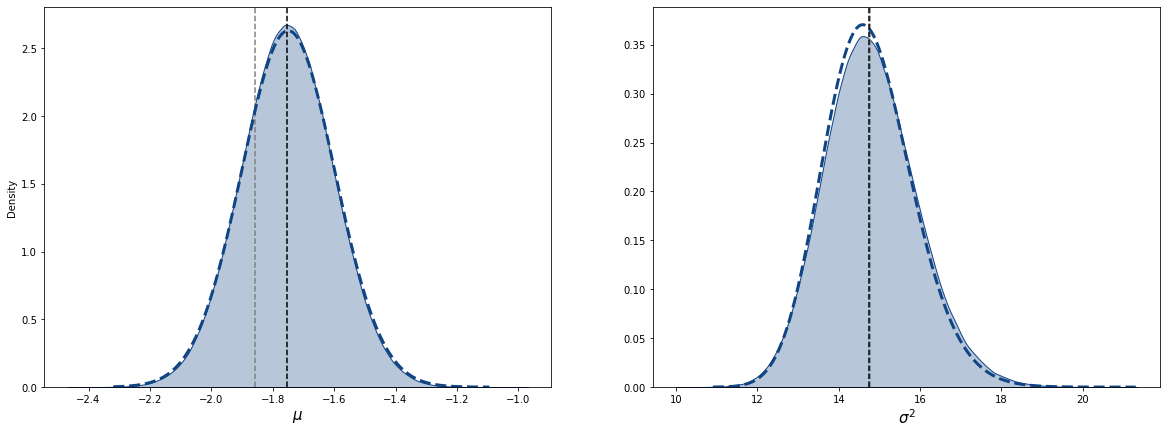

In [61]:
import numpy as np
from scipy.stats import t,invgamma
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,7))

dico_MAD = Normal_MAD
mu_0,nu = dico_MAD["par_prior_loc"]
alpha,beta=dico_MAD["par_prior_scale"]
mu_chain,sigma2_chain = dico_MAD["chains"]["loc"],dico_MAD["chains"]["scale"]**2
mu_chainX,sigma2_chainX = Normal_X[0],Normal_X[1]
N=len(dico_MAD["X"][0])
med,MAD=medMAD(dico_MAD["X"][0])
print(np.mean(dico_MAD["X"][-1]),np.mean(dico_X["X"][0]),med)
print(np.std(dico_MAD["X"][-1]),np.std(dico_X["X"][0]),c*MAD)


print(med,MAD,med_X,MAD_X)
c=1/scipy.stats.norm.ppf(0.75,loc=0,scale=1)
S2= (c*MAD)**2

N_mean,N_var=N * 2/np.math.pi,N*0.3674

alpha_MAD = alpha + N_var / 2
beta_MAD = beta+ (N_var * S2+ N_mean * nu * (med - mu_0) ** 2 / (nu + N_mean))/ 2#mean
mu_MAD = (nu * mu_0 + N_mean * med) / (nu + N_mean)#mean
nu_MAD = nu + N_mean #N_mean
loc_MAD=mu_MAD
scale_MAD=np.sqrt(beta_MAD/(alpha_MAD*nu_MAD))
df_MAD=2*alpha_MAD

sns.kdeplot(mu_chain,ax=ax[0],label="Robust Gibbs",fill=True,alpha=.3,color="#114484")
ax[0].set_xlabel("$\mu$",fontsize=15)

sns.kdeplot(sigma2_chain,ax=ax[1],label="Robust Gibbs",fill=True,alpha=.3,color='#114484')



x = np.linspace(t.ppf(0.0001, df_MAD, loc=loc_MAD, scale=scale_MAD),
                t.ppf(0.99999, df_MAD, loc=loc_MAD, scale=scale_MAD), 1000)

ax[0].plot(x, t.pdf(x, df_MAD, loc=loc_MAD, scale=scale_MAD), '--', label='Approximation pdf (Student)',lw=3,color="#114484")

x = np.linspace(invgamma.ppf(0.00001, alpha_MAD, scale=beta_MAD),
                invgamma.ppf(0.999999, alpha_MAD, scale=beta_MAD), 1000)

ax[1].plot(x,invgamma.pdf(x, alpha_MAD, scale=beta_MAD),'--', label='Approximation pdf (InvGamma)',lw=3,color="#114484")

ax[0].axvline(x=med_X,linestyle="--",color="black",label="True $\mu$ value")

ax[1].axvline(x=(MAD_X*c)**2,linestyle="--",color="black",label="True $\sigma^2$ value")


ax[1].set_xlabel("$\sigma^2$",fontsize=15)
ax[1].set_ylabel("",fontsize=1)


In [69]:
T = 1000000
N = 1000


mu,sigma=-2,4
epsilon=.001
X_0b=np.round(np.random.normal(mu,sigma,N),8)
k=1
c=1/scipy.stats.norm.ppf(0.75,loc=0,scale=1)
while np.linalg.norm(np.array([np.mean(X_0b),np.std(X_0b)])-np.array([np.median(X_0b),scipy.stats.median_abs_deviation(X_0b)*c]))>epsilon:
    X_0b=np.round(np.random.normal(mu,sigma,N),8)
    k+=1
print(k)
med_Xb,MAD_Xb=medMAD(X_0b)

par_prior_loc,par_prior_scale=[0,1],[1,1]

Normal_MADb = Gibbs_med_MAD(T,N,med_Xb,MAD_Xb,"normal",prior_loc="NIG",par_prior_loc=par_prior_loc,par_prior_scale=par_prior_scale)
Normal_Xb=post_NIG(X_0b,par_prior_loc,par_prior_scale,T)

38737


100%|██████████| 1000000/1000000 [11:05<00:00, 1502.14it/s]


In [ ]:
import numpy as np
from scipy.stats import t,invgamma
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,7))

dico_MAD = Normal_MAD
mu_0,nu = dico_MAD["par_prior_loc"]
alpha,beta=dico_MAD["par_prior_scale"]
mu_chain,sigma2_chain = dico_MAD["chains"]["loc"],dico_MAD["chains"]["scale"]**2
mu_chainX,sigma2_chainX = Normal_X[0],Normal_X[1]
N=len(dico_MAD["X"][0])
med,MAD=medMAD(dico_MAD["X"][0])
print(np.mean(dico_MAD["X"][-1]),np.mean(dico_X["X"][0]),med)
print(np.std(dico_MAD["X"][-1]),np.std(dico_X["X"][0]),c*MAD)


print(med,MAD,med_X,MAD_X)
c=1/scipy.stats.norm.ppf(0.75,loc=0,scale=1)
S2= (c*MAD)**2

N_mean,N_var=N * 2/np.math.pi,N*0.3674

alpha_MAD = alpha + N_var / 2
beta_MAD = beta+ (N_var * S2+ N_mean * nu * (med - mu_0) ** 2 / (nu + N_mean))/ 2#mean
mu_MAD = (nu * mu_0 + N_mean * med) / (nu + N_mean)#mean
nu_MAD = nu + N_mean #N_mean
loc_MAD=mu_MAD
scale_MAD=np.sqrt(beta_MAD/(alpha_MAD*nu_MAD))
df_MAD=2*alpha_MAD


alpha_X = alpha + N / 2
beta_X = beta+ (N * S2+ N * nu * (med - mu_0) ** 2 / (nu + N))/ 2
mu_X = (nu * mu_0 + N * med) / (nu + N)
nu_X = nu + N
loc_X=mu_X
scale_X=np.sqrt(beta_X/(alpha_X*nu_X))
df_X=2*alpha_X
ax[0].axvline(x=np.mean(X_0),linestyle="--",color="grey",label="True $\mu$ value")
ax[1].axvline(x=np.var(X_0),linestyle="--",color="grey",label="True $\sigma^2$ value")


#sns.kdeplot(mu_chainX,ax=ax[0],label="Gibbs X",fill=True,alpha=.5,color="orange")
sns.kdeplot(mu_chain,ax=ax[0],label="Robust Gibbs",fill=True,alpha=.3,color="#114484")
ax[0].set_xlabel("$\mu$",fontsize=15)
#ax[0].set_xlim(1.25,2.75)



#sns.kdeplot(sigma2_chainX,ax=ax[1],label="Gibbs X",fill=True,alpha=.5,color='orange')
sns.kdeplot(sigma2_chain,ax=ax[1],label="Robust Gibbs",fill=True,alpha=.3,color='#114484')

x = np.linspace(t.ppf(0.0001, df_X, loc=loc_X, scale=scale_X),
                t.ppf(0.99999, df_X, loc=loc_X,scale=scale_X), 1000)


#ax[0].plot(x, t.pdf(x, df_X, loc=loc_X, scale=scale_X), '--', label='student pdf X',lw=3,color="darkorange")


x = np.linspace(invgamma.ppf(0.00001, alpha_X, scale=beta_X),
                invgamma.ppf(0.999999, alpha_X, scale=beta_X), 1000)

#ax[1].plot(x,invgamma.pdf(x, alpha_X, scale=beta_X),'--', label='invgamma pdf X',lw=3,color="darkorange")

x = np.linspace(t.ppf(0.0001, df_MAD, loc=loc_MAD, scale=scale_MAD),
                t.ppf(0.99999, df_MAD, loc=loc_MAD, scale=scale_MAD), 1000)
ax[0].plot(x, t.pdf(x, df_MAD, loc=loc_MAD, scale=scale_MAD), '--', label='Approximation pdf (Student)',lw=3,color="#114484")
x = np.linspace(invgamma.ppf(0.00001, alpha_MAD, scale=beta_MAD),
                invgamma.ppf(0.999999, alpha_MAD, scale=beta_MAD), 1000)

ax[1].plot(x,invgamma.pdf(x, alpha_MAD, scale=beta_MAD),'--', label='Approximation pdf (InvGamma)',lw=3,color="#114484")
ax[0].axvline(x=med_X,linestyle="--",color="black",label="True $\mu$ value")

ax[1].axvline(x=(MAD_X*c)**2,linestyle="--",color="black",label="True $\sigma^2$ value")


ax[1].set_xlabel("$\sigma^2$",fontsize=15)
ax[1].set_ylabel("",fontsize=1)
